# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | carnot
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | saudarkrokur
Processing Record 6 of Set 1 | ouadda
Processing Record 7 of Set 1 | susuman
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | santyoku
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | praia da vitoria
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | villa gesell
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | nova vicosa
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | ust-tsilma
Processing Record 21 of Set 1 | dhidhdhoo
Processing Record 22 of Set 1 | adamstown
Processing Recor

Processing Record 40 of Set 4 | pitimbu
Processing Record 41 of Set 4 | sant antoni de portmany
Processing Record 42 of Set 4 | abqaiq
Processing Record 43 of Set 4 | brookings
Processing Record 44 of Set 4 | leh
Processing Record 45 of Set 4 | malanje
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | nuku'alofa
Processing Record 48 of Set 4 | montepuez
Processing Record 49 of Set 4 | cidreira
Processing Record 0 of Set 5 | san patricio
Processing Record 1 of Set 5 | weno
Processing Record 2 of Set 5 | lamu
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | tolanaro
Processing Record 5 of Set 5 | at taj
Processing Record 6 of Set 5 | meadow lakes
Processing Record 7 of Set 5 | kuala tungkal
Processing Record 8 of Set 5 | utrik
Processing Record 9 of Set 5 | st. john's
Processing Record 10 of Set 5 | camarinas
Processing Record 11 of Set 5 | borba
Processing Record 12 of Set 5 | natal
Processing Record 13 of Set 5 | bhinmal
Processing Recor

Processing Record 29 of Set 8 | pedro ii
Processing Record 30 of Set 8 | inarajan village
Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | anadyr
Processing Record 33 of Set 8 | kokpekty
Processing Record 34 of Set 8 | laojunmiao
Processing Record 35 of Set 8 | pacific grove
Processing Record 36 of Set 8 | machali
Processing Record 37 of Set 8 | tual
Processing Record 38 of Set 8 | murzuq
Processing Record 39 of Set 8 | nizhneudinsk
Processing Record 40 of Set 8 | chernyshevskiy
Processing Record 41 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 42 of Set 8 | qamdo
Processing Record 43 of Set 8 | lovosice
Processing Record 44 of Set 8 | kismayo
Processing Record 45 of Set 8 | preobrazheniye
Processing Record 46 of Set 8 | arilje
Processing Record 47 of Set 8 | lensk
Processing Record 48 of Set 8 | salekhard
Processing Record 49 of Set 8 | olofstrom
City not found. Skipping...
Processing Record 0 of Set 9 | newman
Processing Record 1 of Set 9 | 

Processing Record 15 of Set 12 | port glaud
City not found. Skipping...
Processing Record 16 of Set 12 | zeya
Processing Record 17 of Set 12 | posto fiscal rolim de moura
Processing Record 18 of Set 12 | bandar-e anzali
Processing Record 19 of Set 12 | plastun
Processing Record 20 of Set 12 | caleta olivia
Processing Record 21 of Set 12 | sona
Processing Record 22 of Set 12 | woodstock
Processing Record 23 of Set 12 | cartagena
Processing Record 24 of Set 12 | yulin
Processing Record 25 of Set 12 | ilula
Processing Record 26 of Set 12 | awjilah
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,0.85,93,40,5.66,CA,1693630825
1,ancud,-41.8697,-73.8203,8.47,64,49,4.39,CL,1693630819
2,carnot,4.9409,15.8665,19.88,98,100,0.65,CF,1693630827
3,talnakh,69.4865,88.3972,10.12,44,100,0.81,RU,1693630828
4,saudarkrokur,65.7461,-19.6394,14.29,76,100,10.05,IS,1693630830


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,93,40,5.66,CA,1693630825
1,ancud,-41.8697,-73.8203,8.47,64,49,4.39,CL,1693630819
2,carnot,4.9409,15.8665,19.88,98,100,0.65,CF,1693630827
3,talnakh,69.4865,88.3972,10.12,44,100,0.81,RU,1693630828
4,saudarkrokur,65.7461,-19.6394,14.29,76,100,10.05,IS,1693630830


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

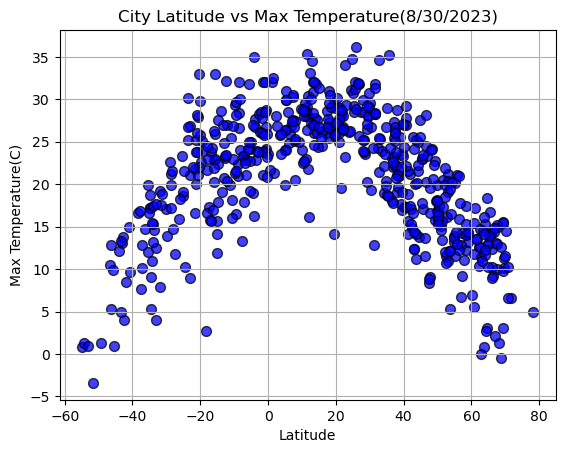

In [35]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Max Temp"]
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature(8/30/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

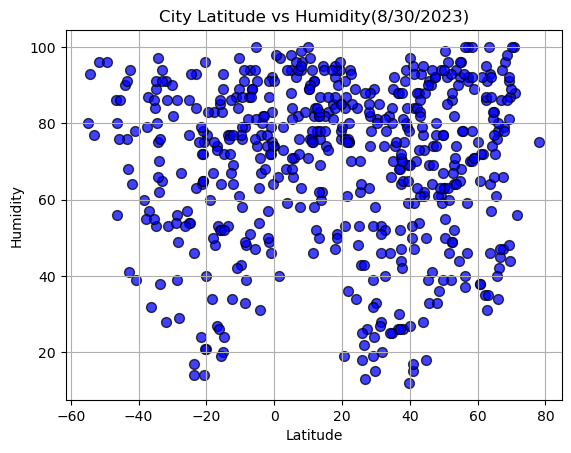

In [33]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df["Lat"]
y=city_data_df["Humidity"]
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(8/30/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

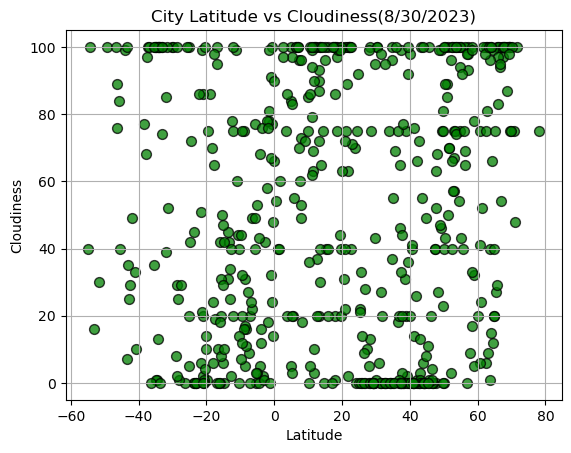

In [36]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]
plt.scatter(x,y,marker="o", facecolors="green", edgecolors="black",
            s=50, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(8/30/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

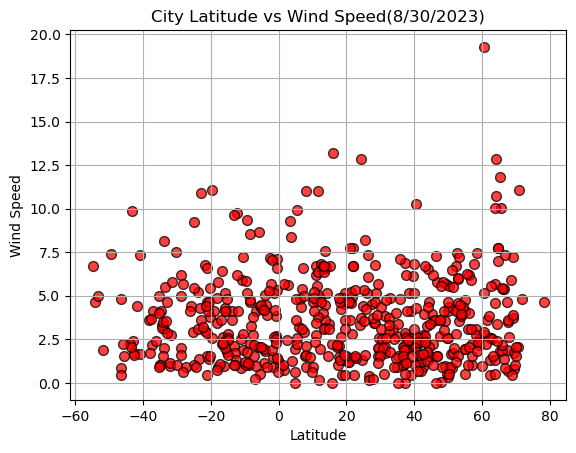

In [37]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y,marker="o", facecolors="red", edgecolors="black",
            s=50, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(8/30/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def linear_plot(x,y,x_,y_,ylabel):
    plt.scatter(x,y)
    slope, intercept, r, p, se = linregress(x, y)
    y_values=slope*x+intercept
    plt.plot(x,y_values,color="red")
    equation=f'y = {round(slope,2)}x + {round(intercept,2)}'
    plt.annotate(equation,(x_,y_),fontsize=15,color="red")
    # Incorporate the other graph properties

    plt.xlabel(x.name)
    plt.ylabel(ylabel)

    print(f'The r-value is: {r**2}')

    # Show plot
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,93,40,5.66,CA,1693630825
2,carnot,4.9409,15.8665,19.88,98,100,0.65,CF,1693630827
3,talnakh,69.4865,88.3972,10.12,44,100,0.81,RU,1693630828
4,saudarkrokur,65.7461,-19.6394,14.29,76,100,10.05,IS,1693630830
5,ouadda,8.0777,22.4007,20.47,96,18,0.92,CF,1693630830


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ancud,-41.8697,-73.8203,8.47,64,49,4.39,CL,1693630819
9,east london,-33.0153,27.9116,12.52,94,100,4.63,ZA,1693630835
10,port elizabeth,-33.9180,25.5701,13.16,62,100,3.09,ZA,1693630836
13,blackmans bay,-43.0167,147.3167,13.07,68,35,2.40,AU,1693630840
14,villa gesell,-37.2639,-56.9730,12.81,87,100,2.15,AR,1693630840


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.620040491122736


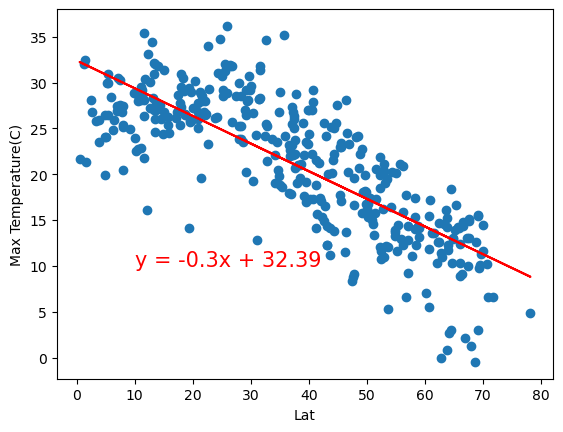

In [43]:
# Build scatter plot for latitude vs. temperature
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
linear_plot(x,y,10,10,"Max Temperature(C)")


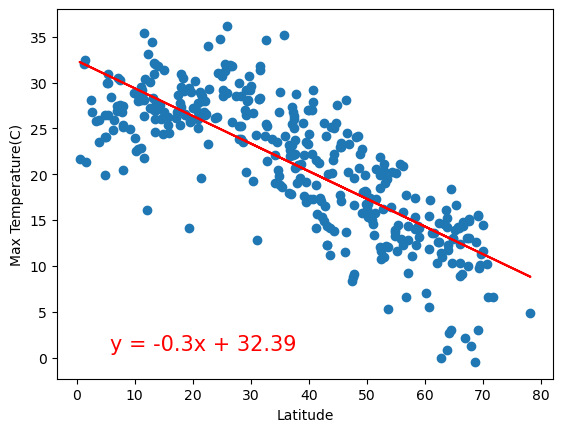

In [45]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.show()

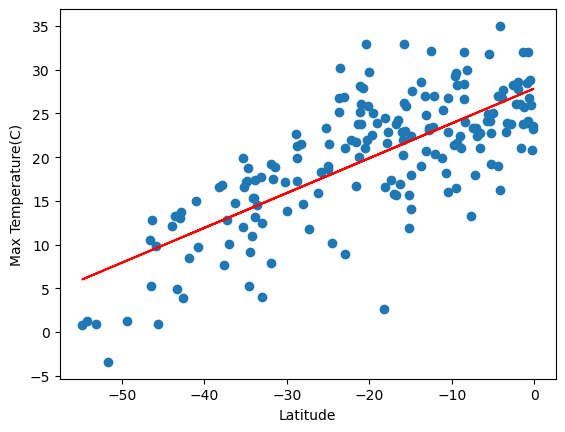

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.show()

In [ ]:
The linear relationships between Max temperatures and Latitudes when comparing the Northern and Southern Hemispheres display 
differing results. In the northern hemisphere the relationship between the max temperature and the latitude is such that as 
the max temperature decreases the latitude increases. In the southern hemisphere the relationship between the same variables shows 
that as the max temperature increases so does the latitude. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004279027693078353


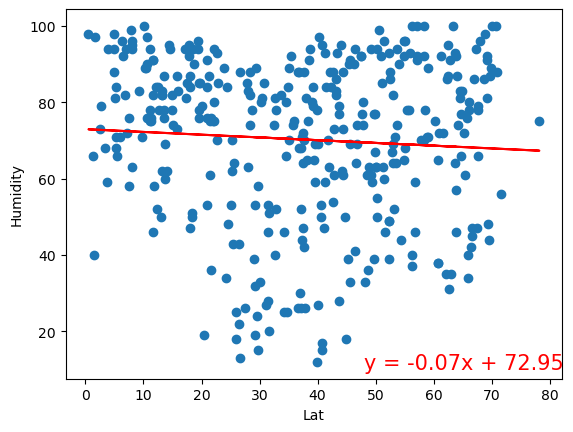

In [47]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
linear_plot(x,y,48,10,"Humidity")

The r-value is: 0.001010869611719372


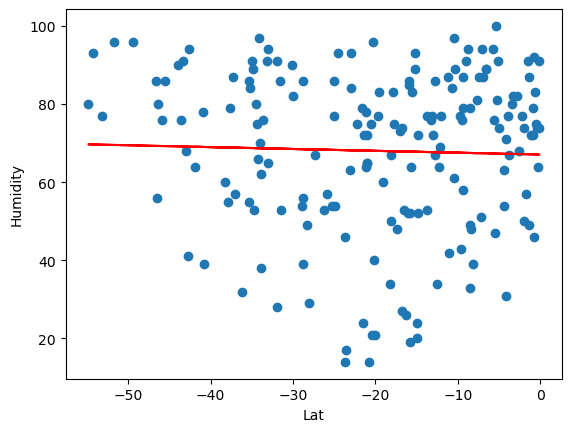

In [48]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
linear_plot(x,y,48,10,"Humidity")

In [ ]:
When comparing the regression lines and scatter plots of the northern and southern hemispheres using the variables of humidity 
and latitude, the hemispheres display similar regression lines. The scatter plots show the two variables are fairly unrelated as 
they both have a slightly negative slope. 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002539761810539318


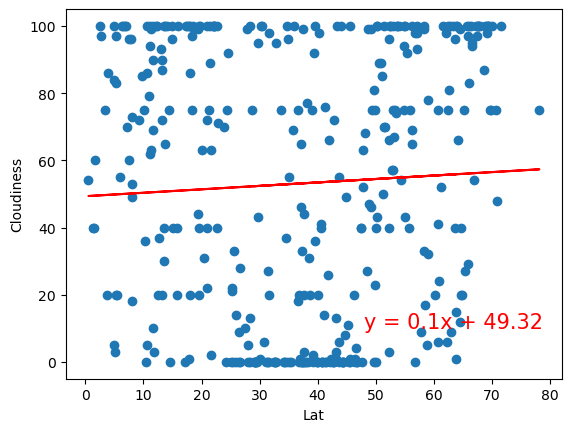

In [49]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
linear_plot(x,y,48,10,"Cloudiness")

The r-value is: 0.05191397292142851


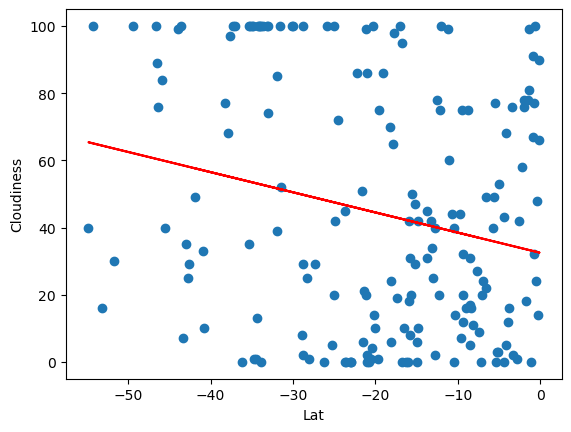

In [50]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
linear_plot(x,y,48,10,"Cloudiness")

In [ ]:
In the northern hemisphere there was a slightly positive relationship between cloudiness and latitude.
In the southern hemisphere there is a slightly negative relationship between cloudiness nad latitude. Both of these 
conclusions being reached by looking at the slope and direction of the regression lines. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.139501297110149e-05


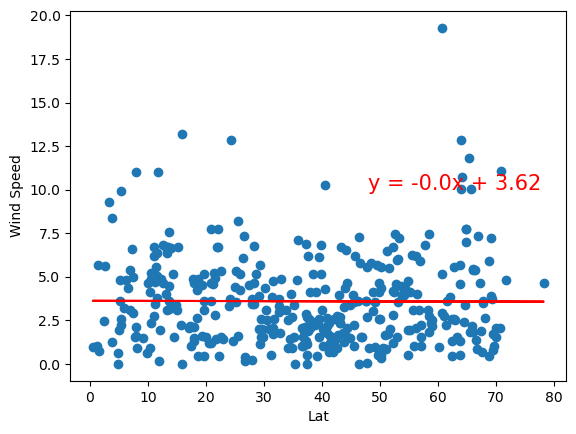

In [51]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
linear_plot(x,y,48,10,"Wind Speed")

The r-value is: 2.5205736000139456e-05


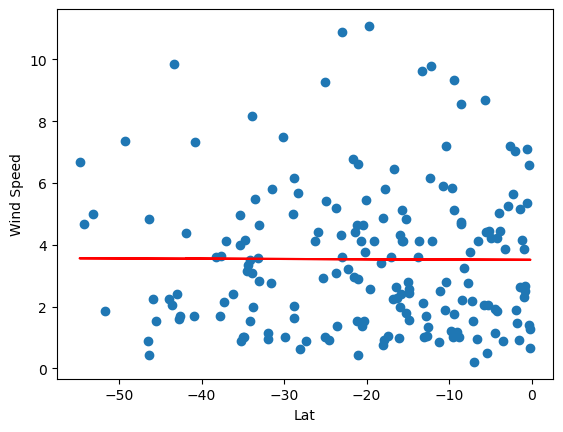

In [52]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
linear_plot(x,y,48,10,"Wind Speed")

In [ ]:
In both the northern and southern hemispheres there appears to be little relationship between wind speed
and latitude as the slopes of each of the regression lines is fairly flat. 